In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
from keras.applications.densenet import DenseNet121, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
image_size = 500
batch_size = 32
num_classes = 4
epochs = 10

In [4]:
import os
labels = os.listdir('/content/drive/MyDrive/lungs_data/cptn_dataset/Train/')
print(labels)

['Tb', 'Covid', 'Normal', 'Pneumonie']


In [9]:
train_datagen = ImageDataGenerator(rescale=1./255 ,rotation_range=45,width_shift_range=0.2,
                                   height_shift_range=0.2,horizontal_flip=True, vertical_flip=True,
                                   shear_range=0.2,zoom_range=0.2,fill_mode='reflect', validation_split=0.2)
train_data = train_datagen.flow_from_directory('/content/drive/MyDrive/lungs_data/Train/',
                                               target_size=(image_size, image_size),
                                               class_mode='categorical',
                                               batch_size=batch_size,
                                               shuffle=True
                                              )
validation_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/lungs_data/Train/',target_size=(image_size,image_size),
                                                         batch_size=batch_size,
                                                         class_mode='categorical',
                                                         subset='validation') 
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/lungs_data/cptn_dataset/Test/",target_size=(image_size, image_size),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 9847 images belonging to 4 classes.
Found 1969 images belonging to 4 classes.
Found 2120 images belonging to 4 classes.


In [ ]:
valid_X, valid_Y = next(validation_generator)
test_X, test_Y = next(test_generator)

In [ ]:
#définition du model
def inception_v3():
    img_in = Input(t_x.shape[1:])               
    model =  InceptionV3(include_top= False , 
                weights='imagenet',      
                input_tensor= img_in, 
                input_shape= t_x.shape[1:],
                pooling ='avg')
    x = model.output  
    predictions = Dense(4, activation="softmax", name="predictions")(x)    
    model = Model(inputs=img_in, outputs=predictions)
    return model

In [ ]:
#compilation du model
model = inception_v3()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                           metrics = ['accuracy'])

In [ ]:
#Entrainement du model
history = model.fit_generator(train_generator, 
                                  steps_per_epoch=100,
                                  validation_data = (valid_X,valid_Y), 
                                  epochs = 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
100/100 [==============================] - 74s 679ms/step - loss: 0.3509 - accuracy: 0.8752 - val_loss: 25.6397 - val_accuracy: 0.2188
Epoch 2/10
100/100 [==============================] - 67s 673ms/step - loss: 0.1835 - accuracy: 0.9359 - val_loss: 1.1091 - val_accuracy: 0.7500
Epoch 3/10
100/100 [==============================] - 67s 667ms/step - loss: 0.1176 - accuracy: 0.9604 - val_loss: 5.3386 - val_accuracy: 0.4062
Epoch 4/10
100/100 [==============================] - 67s 668ms/step - loss: 0.1082 - accuracy: 0.9635 - val_loss: 1.2008 - val_accuracy: 0.7812
Epoch 5/10
100/100 [==============================] - 68s 673ms/step - loss: 0.1154 - accuracy: 0.9613 - val_loss: 3.6868 - val_accuracy: 0.4375
Epoch 6/10
100/100 [==============================] - 67s 669ms/step - loss: 0.1094 - accuracy: 0.9648 - val_loss: 2.1757 - val_accuracy: 0.7500
Epoch 7/10
100/100 [==============================] - 67s 672ms/step - loss: 0.0711 - accuracy: 0.9750 - val_loss: 0.8884 - val_a

In [ ]:
model.save("/content/drive/MyDrive/InceptionNet2.hdf5")

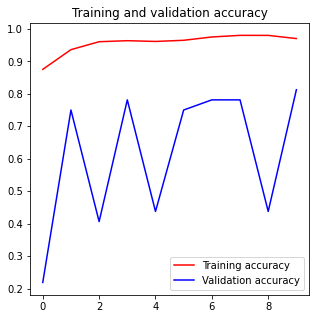

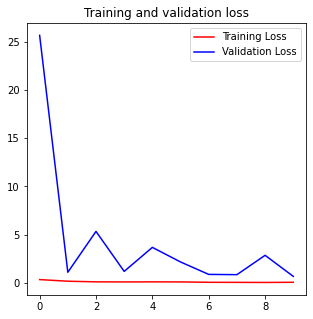

In [ ]:
#historique d'entrainement
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(5,5))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize = (5,5))

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
y_pred = model.predict(test_X)

In [ ]:
import numpy as np
pred_class = []
for i in range(len(y_pred)):
    pred_class.append(np.argmax(y_pred[i]))

actual_class = []
for i in range(len(test_Y)):
    actual_class.append(np.argmax(test_Y[i]))

print('accuracy_score = ',accuracy_score(pred_class,actual_class))

accuracy_score =  0.90625


In [ ]:
score = model.evaluate_generator(test_generator,steps = test_generator.samples // 100) 
print("\n\n")
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.





Test Loss: 0.04725559800863266
Test accuracy: 0.9859374761581421


In [ ]:
pred_datagen = ImageDataGenerator(rescale = 1./255)

pred_generator = pred_datagen.flow_from_directory('/content/drive/MyDrive/lungs_data/cptn_dataset/Test/',target_size=(image_size, image_size),
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle = False)  

Found 2034 images belonging to 4 classes.


In [ ]:
pred_generator.reset()
y_pred = model.predict_generator(pred_generator)
Y_test = pred_generator.classes[pred_generator.index_array]
Y_pred = np.argmax(y_pred, axis=-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

--------------------
| Confusion Matrix |
--------------------

 [[541  11   0   0]
 [  3 548   7   0]
 [  2  24 550   0]
 [  0   0   0 348]]


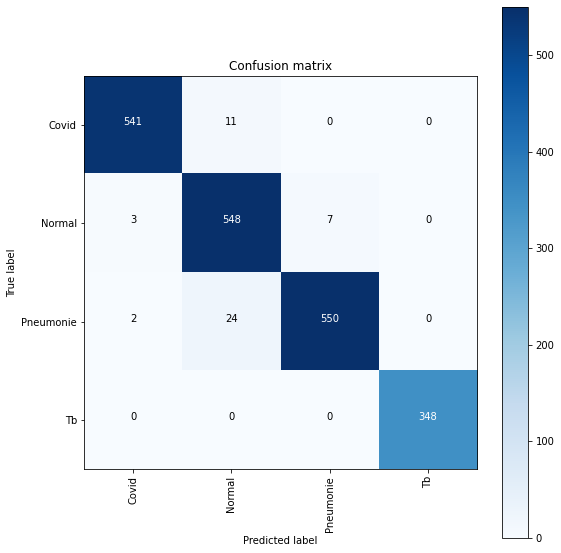

In [ ]:
import itertools
cm = confusion_matrix(Y_test, Y_pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['Covid','Normal','Pneumonie','Tb'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()